<a href="https://colab.research.google.com/github/thanhnguyen2612/diveintocode-ml/blob/master/ML_week2_preclass_ass2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
!pip install quilt
!quilt install ResidentMario/missingno_data

ResidentMario/missingno_data already installed.
Overwrite? (y/n) y
Fragments already downloaded


# Exploratory data analysis Pre-class assignment 2 Analysis of housing information

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## [Problem 1] Obtaining a dataset

In [114]:
df = pd.read_csv('sample_data/train.csv')
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## [Problem 2] Investigating the dataset itself

The dataset contains information of residential homes in Ames, Iowa and their sale prices. There are 79 feature variables and 1 objective variable (SalePrice). Some aspects of a home are concerned:

*   Dwelling properties (type, style, rooms size, etc.)
*   Dwelling status (condition, age, etc.)
*   Material properties (type of roof, veneer, etc.)
*   Basement, garage, pool properties, etc.
*   Surrounding area characteristic (street, pavement, neighborhood, commodities, zone)
*   Sale information (price, time sold, sale condition)
*   Miscellaneous

## [Problem 3] Checking the data

In [115]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

print("Numeric data features:")
print(df.select_dtypes(include=numerics).columns)

Numeric data features:
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


The above informations are mainly measurable. However some features such as 'MSSubClass' are reasonably categorical data but can be represented as integer values as well.

In [116]:
print("Text data (include categorical data represented by text labels):")
print(df.select_dtypes(exclude=numerics).columns)

Text data (include categorical data represented by text labels):
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [117]:
print("Target variable is 'SalePrice', its type is", df['SalePrice'].dtype)
print(df['SalePrice'])

Target variable is 'SalePrice', its type is int64
0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [118]:
features_df = df.drop(columns=['Id', 'SalePrice'])
features_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


## [Problem 4] Dealing with missing values

In [119]:
features_df.columns[features_df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

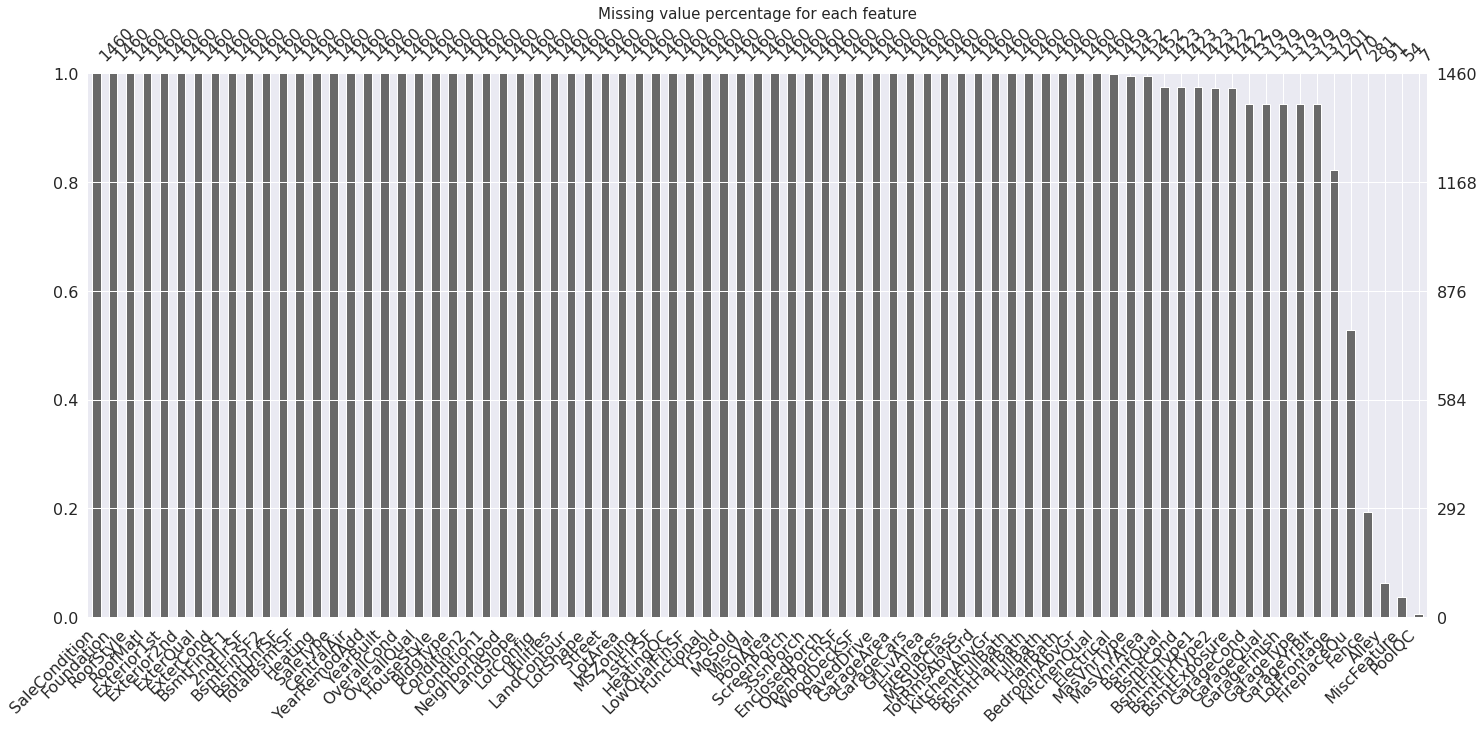

In [120]:
import missingno as msno

msno.bar(features_df, labels=True, sort="descending")
plt.title("Missing value percentage for each feature")
plt.show()

In [121]:
total = df.isnull().sum().sort_values(ascending=False)
ratio = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_features = pd.concat([total, percentage], axis=1, keys=['Total', 'missing_ratio'])
missing_features.head(15)

,Total,missing_ratio
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [122]:
# Remove features (columns) have 5 or more missing values
drop_df = df.drop(columns=missing_features[missing_features['Total'] >= 5].index)

## [Problem 5] Researching terminology

1.   **Kurtosis**: a measure of the combined weight of a distribution's tails relative to the center of the distribution (measures extreme values in either tail). Types of kurtosis:
    
*   Mesokurtic: distribution with zero excess kurtosis
*   Leptokurtic: distribution with positive excess kurtosis
*   Platykurtic: distribution with negative excess kurtosis

2.   **Skewness**: a measure of the asymmetry of a probability distribution around its mean.
*   Negative skew: tail is on the left side of the distribution, the peak is prone to the right side
*   Positive skew: reverse of the negative skew (tail is on the right side)

## [Problem 6] Confirming distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


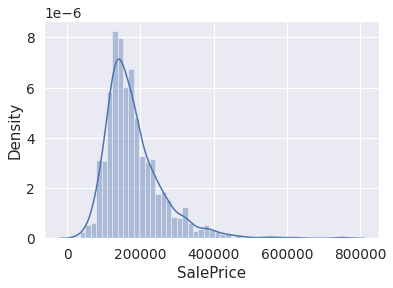

In [123]:
sns.distplot(drop_df['SalePrice'])
plt.show()

In [124]:
print("Kurtosis:", drop_df['SalePrice'].kurtosis())
print("Skewness:", drop_df['SalePrice'].skew())

Kurtosis: 6.536281860064529
Skewness: 1.8828757597682129


Computation show that distribution is positive skewness. Therefore, performing logarithmic transformation can remove the skewness and normalize the distribution making the resulting data follows normal distribution. Why it's success because the data may originally follow log-normal distribution

Kurtosis: 0.8095319958036296
Skewness: 0.12133506220520406


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


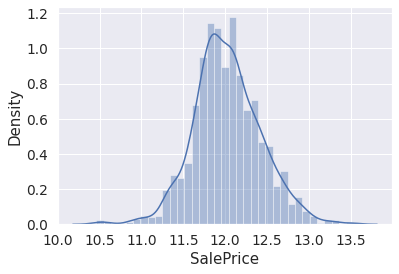

In [125]:
log_saleprice = np.log(drop_df['SalePrice'])
print("Kurtosis:", log_saleprice.kurtosis())
print("Skewness:", log_saleprice.skew())

sns.distplot(log_saleprice)
plt.show()

The skewness and kurtosis values decrease significantly (towards zero). Normal distribution as such can leverage the feature scaling process and increase prediction accuracy.

## [Problem 7] Confirming the correlation coefficient

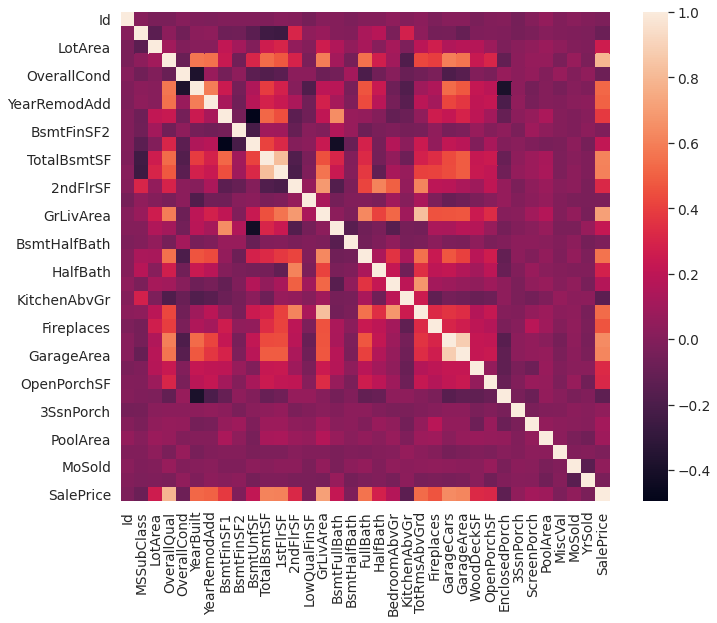

In [126]:
# Correlation matrix
corrmat = drop_df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, square=True)
plt.show()

* It's shown that 'TotalBsmtSF' and '1stFlrSF' are correlated, which is reasonable because the basement and 1st floor are adjacent and tend to be constructed same size. 
* There are also 'GarageCars' and 'GarageArea' having correlation relationship (correlation coefficient is about 0.8), which is reasonable again without needing explanation.
* Other features correlate directly to target 'SalePrice' may be 'OverallQual, 'GarageCars', 'GrLivArea'. These are some potential features we may concern.

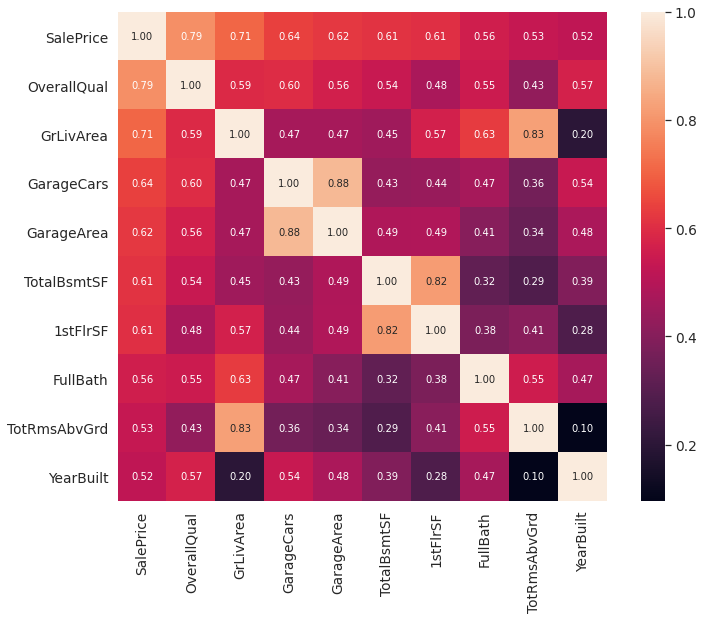

In [127]:
# 10 features/cols have the highest correlation coefficient values with target variable 'SalePrice'
cols = corrmat.nlargest(10, 'SalePrice').index
top10_corrmat = np.corrcoef(drop_df[cols].values.T)
sns.set(font_scale=1.25)
plt.figure(figsize=(12, 9))
sns.heatmap(top10_corrmat, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Summary data descriptions:

*   **SalePrice**: the property's sale price in dollars. This is the target variable that you're trying to predict
*   **OverallQual**: Overall material and finish quality
*   **GrLivArea**: Above grade (ground) living area square feet
*   **GarageCars**: Size of garage in car capacity
*   **GarageArea**: Size of garage in square feet
*   **TotalBsmtSF**: Total square feet of basement area
*   **1stFlrSF**: First Floor square feet
*   **FullBath**: Full bathrooms above grade
*   **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
*   **YearBuilt**: Original construction date

*   As expected, **GarageCars** and **GarageArea** are highly correlated (0.88), they can be combine
*   **GrLiveArea** and **TotRmsAbvGrd**: 0.83
*   **TotalBsmtSF** and **1stFlrSF**: 0.82

These combinations of pair features can be considered as redundancy when performing predictions. Therefore, we can keep just one feature representative for each combination. **GarageCars** and **GarageArea** are considered the same, but **GarageCars** has higher coefficient with **SalePrice** so we can remove **GarageArea** from selected features. The same with other combinations.